# Домашнее задание 3. Часть I. Анализ данных

Вам предлагается проанализировать датасет с Data - вакансиями.  
Скачайте его https://disk.yandex.ru/d/QUa3pCKVk48cAQ и считайте с помощью `pd.read_csv`.




In [40]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/poulinatimosenko/Downloads/vacancies.csv', index_col='Unnamed: 0')

0. Выведите первые 5 и последние 5 строк датасета. Примените к датасету методы `info` и `describe`

In [3]:
df.head()

,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills
0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[]
1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[]
2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe..."
3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[]
4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']"


In [4]:
df.tail()

,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills
1522,Senior Data Scientist в b2c направление,HeadHunter,Москва,От 3 до 6 лет,Гибкий график,Полная занятость,"Программист, разработчик",NaN,<p>Наша команда работает с соискательской функ...,"['Python', 'Machine Learning', 'SQL', 'PyTorch..."
1523,Data analyst (Senior),Иви,Москва,От 3 до 6 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>Иви — один из лидеров рынка онлайн-...,[]
1524,Senior Data Analyst,Autodoc Group (Автодок Казахстан),Алматы,От 3 до 6 лет,Полный день,Полная занятость,Продуктовый аналитик,NaN,<p>Company Description</p> <p>AUTODOC is a tec...,[]
1525,TeamLead Data Engineer,HeadHunter,Москва,От 3 до 6 лет,Полный день,Полная занятость,"Программист, разработчик",NaN,"<p><strong>Привет,</strong> <strong>на связи к...","['Python', 'Apache Airflow', 'Apache Cassandra..."
1526,Senior Python Developer (Data Platform),Mindbox,Москва,От 3 до 6 лет,Гибкий график,Полная занятость,"Программист, разработчик",NaN,<p><strong>Mindbox</strong> — крупнейшая в Рос...,"['Python', 'PySpark', 'Airflow', 'Kafka', 'Del..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 0 to 1526
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   position_name       1527 non-null   object
 1   employer_name       1527 non-null   object
 2   area                1527 non-null   object
 3   experience          1527 non-null   object
 4   schedule            1527 non-null   object
 5   employment          1527 non-null   object
 6   professional_roles  1527 non-null   object
 7   salary              220 non-null    object
 8   description         1527 non-null   object
 9   key_skills          1527 non-null   object
dtypes: object(10)
memory usage: 131.2+ KB


In [6]:
df.describe()

,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills
count,1527,1527,1527,1527,1527,1527,1527,220,1527,1527
unique,793,524,102,4,5,4,36,130,1232,653
top,Data Engineer,СБЕР,Москва,От 3 до 6 лет,Полный день,Полная занятость,Дата-сайентист,"{'from': 100000, 'to': 110000, 'currency': 'RU...",<p>Striving to gain market-oriented knowledge ...,[]
freq,126,146,912,724,1098,1464,464,20,46,607


1. Сколько в датасете строк и столбцов? **(1)**

In [7]:
df.shape

(1527, 10)

**1527 строк, 10 колонок**

2. Есть ли в датасете пропуски? **(1)**

**есть пропуски в колонке с зарплатой**

3. Есть в датасете полные дубли? Если да, удалите их (метод drop_duplicates). **(1)**

In [8]:
df.duplicated().sum()

146

**есть 146 дубликатов(не учитывая первый встретившийся экземпляр)**

In [9]:
df = df.drop_duplicates()

4. Сколько уникальных значений у переменной professional_roles? **(1)**

**36**

5. Сколько в датасете вакансий, не требующих опыта? (**1**)

In [10]:
df['experience'].value_counts()

experience
От 3 до 6 лет         637
От 1 года до 3 лет    546
Нет опыта             121
Более 6 лет            77
Name: count, dtype: int64

**121**

6. Какое среднее количество навыков в вакансии? (переменная key_skills) **(2)**

In [11]:
df['key_skills'].apply(lambda x: len(x)).mean()

52.790731354091236

~53

7. Какие валюты (ключ currency в поле salary) используются для заработной платы? Создайте столбец currency.  **(2)**
*Подсказка. Как вариант, можете воспользоваться функцией eval, которая исполняет код, написанный в строке. Для проверки на NaN можете использовать pd.isnull()*

In [12]:
def extract_currency(item):
    try:
        salary_dict = eval(item)
        return salary_dict.get('currency')
    except:
        pass
    return np.nan

df['currency'] = df['salary'].apply(extract_currency)

In [13]:
df['currency'].value_counts()

currency
RUR    166
USD     18
KZT     12
EUR      4
UZS      2
BYR      1
Name: count, dtype: int64

8. Какая компания лидирует по количеству вакансий? **(1)**

In [14]:
df['employer_name'].value_counts()

employer_name
СБЕР                                 124
Aston                                 56
Т-Банк                                49
EPAM Uzbekistan                       39
Газпромбанк                           27
                                    ... 
БСТ Менеджмент-Консалтинг              1
Clear Mind                             1
X5 Digital                             1
Московская Биржа                       1
Autodoc Group (Автодок Казахстан)      1
Name: count, Length: 524, dtype: int64

**Лидирует Сбер, это можно видеть и в таблице, которую создали методом describe**

9.  Какая компания лидирует по количеству вакансий с указанием заработной платы? **(1)**

In [15]:
df[df['salary'].notna()]['employer_name'].value_counts()

employer_name
Aston                          22
Changellenge                    6
Алабуга, ОЭЗ ППТ                6
СБЕР                            5
Innovative People               4
                               ..
ФГАНУ НИИ Спецвузавтоматика     1
QIC                             1
Анвио Парк                      1
HR IMPLANT                      1
HeadHunter                      1
Name: count, Length: 130, dtype: int64

**Aston**

10. Создайте столбец salary_num. Рассчитайте его, используя столбец salary. Если в это столбце указана вилка зарплаты, используйте среднее значение между from и to. Если указано только одно из значений (from или to, используйте его) **(2)**

In [16]:
def calculate_salary_num(salary_str):
    
    if not isinstance(salary_str, str):
        return np.nan
    
    salary_dict = eval(salary_str)
        
    from_val = salary_dict.get('from')
    to_val = salary_dict.get('to')
        
    def parse_value(val):
        if val == 'null':
            return None
        else:
            return float(val)
        
    from_num = parse_value(from_val)
    to_num = parse_value(to_val)
        
    if from_num is not None and to_num is not None:
        return (from_num + to_num) / 2
        
    elif from_num is not None:
        return from_num
        
    elif to_num is not None:
        return to_num

In [17]:
df['salary_num'] = df['salary'].apply(calculate_salary_num)

In [18]:
df.head()

,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills,currency,salary_num
0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[],RUR,372500.0
1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[],KZT,800000.0
2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe...",NaN,NaN
3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[],NaN,NaN
4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']",KZT,950000.0


11. Какая средняя заработная плата среди вакансий в рублях? А медианная заработная плата?  **(2)**

**средняя зарплата**

In [19]:
round(df[df['currency'] == 'RUR']['salary_num'].mean(), 2)

213545.18

**медианная зарплата**

In [20]:
df[df['currency'] == 'RUR']['salary_num'].median()

200000.0

12. Создайте столбец is_python_requirement, который принимает значение 1, если в key_skills присутствует python (учитывайте написание в любом регистре, а также вхождения подстроки python.).  Какой процент вакансий требует знания python? **(3)**

In [21]:
def check_python_requirement(skills_str):
    
    skills_list = eval(skills_str)
        
    for skill in skills_list:
        if 'python' in skill.lower():
            return 1     

In [22]:
df['is_python_requirement'] = df['key_skills'].apply(check_python_requirement)

python_vacancies = df['is_python_requirement'].sum()
total_vacancies = len(df)
python_percentage = round((python_vacancies / total_vacancies) * 100, 2)

python_percentage

41.85

**41,85% вакансий требуют знания питона**

13. Сгруппируйте по столбцам experience, schedule, employment, is_python_requirement (сразу по четырем столбцам). Найдите по каждой группе:
- количество опубликованных вакансий
- количество компаний, которые опубликовали вакансии
- среднюю заработную плату среди вакансий с указанием зарплаты в рублях
 **(3)**

In [23]:
df_groupped = df.groupby(['experience', 'schedule', 'employment', 'is_python_requirement']).agg(
    vacancy_count=('employer_name', 'size'),
    company_count=('employer_name', 'nunique'),
    avg_salary_rub=('salary_num', lambda x: x[(df.loc[x.index, 'currency'] == 'RUR')].mean())
).reset_index()

df_groupped

,experience,schedule,employment,is_python_requirement,vacancy_count,company_count,avg_salary_rub
0,Более 6 лет,Полный день,Полная занятость,1.0,10,9,NaN
1,Более 6 лет,Удаленная работа,Полная занятость,1.0,12,10,310000.000000
2,Нет опыта,Гибкий график,Полная занятость,1.0,2,2,225000.000000
3,Нет опыта,Гибкий график,Стажировка,1.0,3,1,NaN
4,Нет опыта,Полный день,Полная занятость,1.0,48,6,85714.285714
5,Нет опыта,Полный день,Стажировка,1.0,9,3,NaN
6,Нет опыта,Удаленная работа,Полная занятость,1.0,1,1,NaN
7,Нет опыта,Удаленная работа,Стажировка,1.0,21,1,105000.000000
8,От 1 года до 3 лет,Гибкий график,Полная занятость,1.0,17,14,163333.333333
9,От 1 года до 3 лет,Гибкий график,Частичная занятость,1.0,1,1,NaN


14. Создайте столбец count_skills. В нём должна быть длина списка, который находит в столбце key_skills. Обратите внимание, что изначально столбец key_skills - строка, например, '[]' Подумайте, как превратить её в список и посчитать его длину.  **(3)**

In [24]:
def count_skills(skills_str):
    
    skills_list = eval(skills_str)
    return len(skills_list)

In [25]:
df['count_skills'] = df['key_skills'].apply(count_skills)

In [26]:
df.head()

,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills,currency,salary_num,is_python_requirement,count_skills
0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[],RUR,372500.0,NaN,0
1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[],KZT,800000.0,NaN,0
2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe...",NaN,NaN,1.0,11
3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[],NaN,NaN,NaN,0
4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']",KZT,950000.0,NaN,2


15. Создайте столбец len_descr, в котором должна быть длина описания (description) в символах без учета html тегов ("<...>"). Напишите для этого функцию get_len_descr.  **(3)** Можете использовать регулярные выражения.
То есть, ваш код может выглядеть, например, так:

In [27]:
def get_len_descr(descr):
    clean = re.sub(r'<[^>]*>', '', descr)
    return len(clean)

In [28]:
df['len_descr'] = df['description'].apply(get_len_descr)

16. Постройте таблицу корреляций с тремя переменными: salary_num, len_descr, count_skills.  **(1)**

In [50]:
correlation_matrix = pd.DataFrame(df[['salary_num', 'len_descr', 'count_skills']].corr())

In [53]:
correlation_matrix

,salary_num,len_descr,count_skills
salary_num,1.000000,-0.008463,-0.007479
len_descr,-0.008463,1.000000,0.127013
count_skills,-0.007479,0.127013,1.000000


17. Постройте тепловую карту из таблицы из предыдущего пункта.  **(1)**

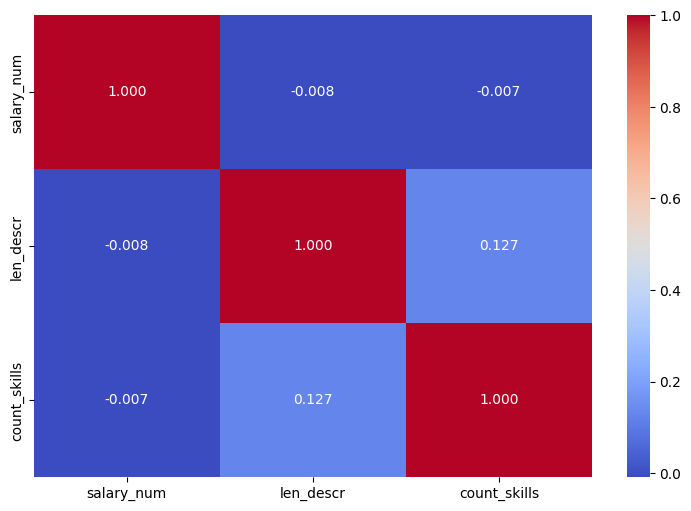

In [54]:
plt.figure(figsize=(9, 6))

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".3f", 
    cmap='coolwarm'
)
plt.show()

18. Какие скиллы чаще всего требуются? Выведите топ-10 требуемых скиллов. **(1)**

In [61]:
all_skills= df['key_skills'].apply(lambda x: eval(x)).explode()

all_skills.str.strip().str.lower().value_counts().head(10)

key_skills
python             578
sql                532
etl                146
big data           125
hadoop             111
postgresql         107
dwh                103
clickhouse          94
английский язык     82
apache airflow      76
Name: count, dtype: int64

19. Постройте гистограмму распределения зарплаты среди вакансий в рублях.  **(2)**

In [78]:
df_rub = df[df['currency'] == 'RUR']

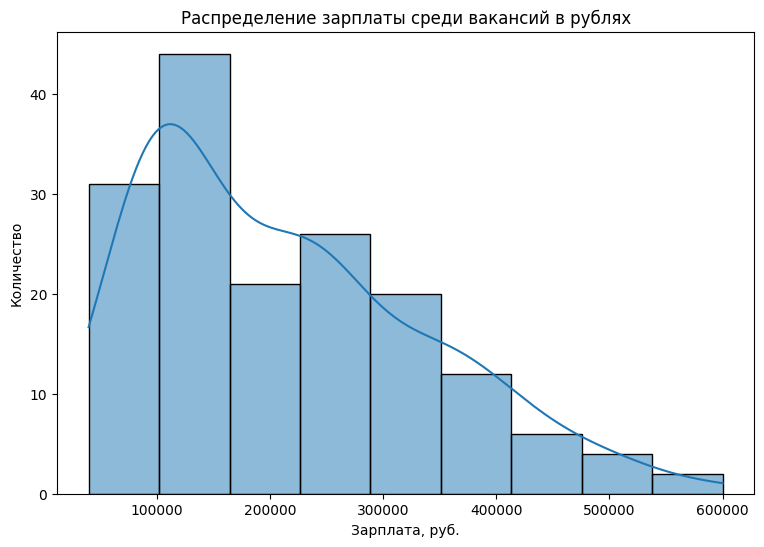

In [80]:
plt.figure(figsize=(9, 6))

sns.histplot(
    df_rub['salary_num'],
    kde=True
)

plt.title('Распределение зарплаты среди вакансий в рублях')
plt.xlabel('Зарплата, руб.')
plt.ylabel('Количество')
plt.show()

20. Постройте boxplot зарплаты (среди вакансий в рублях) с группировкой по полю experience **(2)**

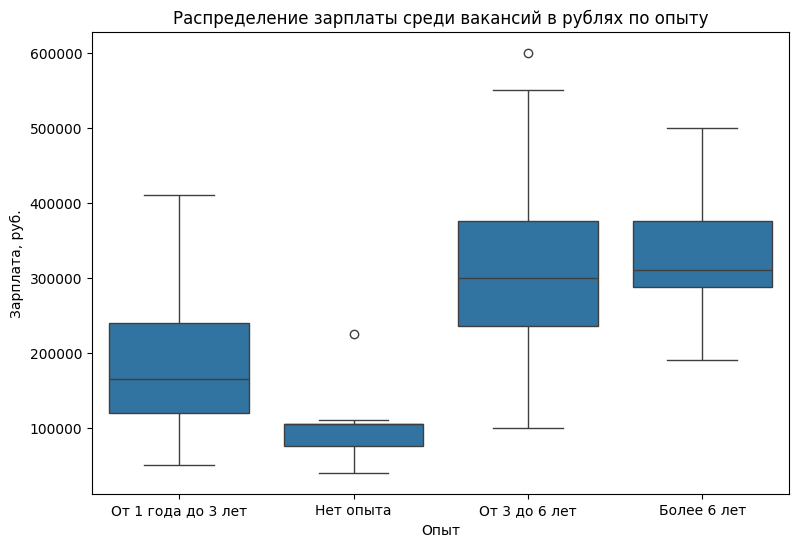

In [82]:
plt.figure(figsize=(9, 6))

sns.boxplot(
    df_rub,
    x='experience',
    y='salary_num'
)

plt.title('Распределение зарплаты среди вакансий в рублях по опыту')
plt.xlabel('Опыт')
plt.ylabel('Зарплата, руб.')
plt.show()

21. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(2)**

**связь зарплаты от количества требуемых навыков**

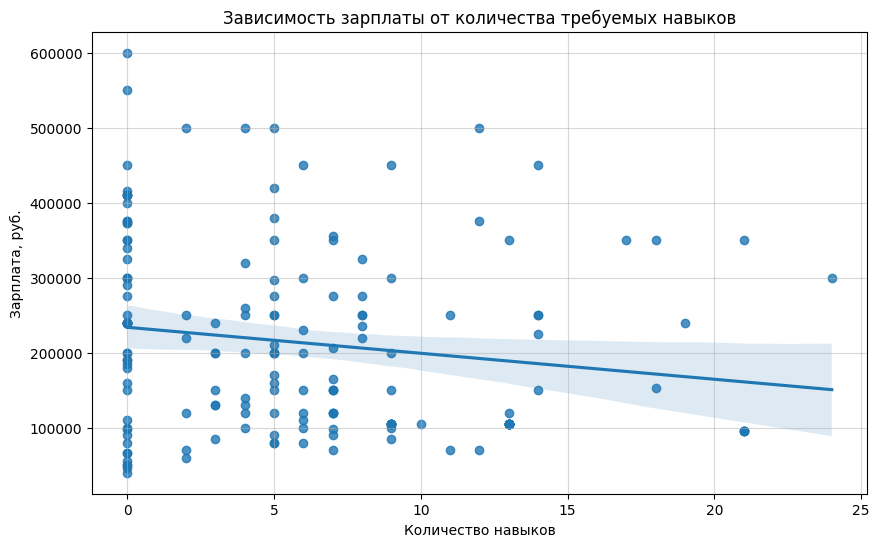

In [86]:
df_analysis = df[
    (df['currency'] == 'RUR') & 
    (df['salary_num'].notna()) & 
    (df['count_skills'].notna())
]

plt.figure(figsize=(10, 6))

sns.regplot(
    df_analysis,
    x='count_skills',
    y='salary_num'
)

plt.title('Зависимость зарплаты от количества требуемых навыков')
plt.xlabel('Количество навыков')
plt.ylabel('Зарплата, руб.')
plt.grid(alpha=0.5)
plt.show()

In [90]:
round(df_analysis['count_skills'].corr(df_analysis['salary_num']), 2)

-0.16

**Можно заметить, что между требуемым количеством навыков и зарплатой наблюдается отрицательная связь. При этом, уровень корреляции слабый. Для подтверждения или опровержения наличия связи нужно проверить, насколько полученное значение значимо.**

In [95]:
from scipy import stats

corr, p_value = stats.pearsonr(df_analysis['salary_num'], df_analysis['count_skills'])

p_value

0.041150869613480155

**p < 0.05, значит на уровне значимости альфа=0.05 корреляция статистически значима. То есть, количество навыков и зарплата имеют отрицательную статистически значимую связь. Чем больше навыков требуется в вакансии, тем меньше будет зарплата.**